# DESU DATA SCIENCE - 2022 / 2023

## Projet : système de recommandations de musiques Spotify

#### Dataset utilisé : 
https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

#### Description du dataset :


artist: Name of the Artist.

song: Name of the Track.

duration_ms: Duration of the track in milliseconds.

explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
year: Release Year of the track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
genre: Genre of the track.

#### Import libraries

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
sns.set_style("whitegrid")

from kneed import KneeLocator
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [223]:
data = pd.read_csv('/Users/louisehonnorat/Desktop/Documents/Etudes/DESU Data Science/Cours/Statistiques/Projet/Projet 1/songs_normalize.csv')

## Exploratory Analysis

In [224]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


On peut voir les différentes variables qui composent le dataset.

In [225]:
data.shape

(2000, 18)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


On peut voir qu'on a 2000 lignes et 18 variables : 1 booléen, 9 float, 5 int et 3 object.

On converti le booléen en 1 ou 0 pour pouvoir l'utiliser en variable numérique.

In [227]:
data["explicit"] = data["explicit"].astype(int)

In [228]:
data.describe()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,0.275500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,0.446878,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,0.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,0.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,0.000000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,1.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,1.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


On regarde le nombre d'artistes dans le dataset.

In [229]:
artist=data['artist'].value_counts()
artist

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

Il y a 835 artistes dans le dataset.

On regarde les différents genres de musique.

In [230]:
genre = data['genre'].value_counts()
genre

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

Différents genres de musique sont représentés, le plus courant étant la pop. De nombreux genres n'apparaissent qu'une seule fois.

Toutefois il y a set() qui apparait 22 fois.

In [231]:
data.loc[data['genre'] == 'set()']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,Wheatus,Teenage Dirtbag,241666,1,1999,71,0.625,0.850,4,-3.904,1,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,0,2002,66,0.607,0.923,1,-6.777,1,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
291,Blazin' Squad,Crossroads - Radio Edit,188693,0,2012,40,0.661,0.746,4,-5.153,1,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
428,George Michael,Amazing,265826,0,2004,57,0.805,0.754,10,-6.825,0,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,0,2004,51,0.853,0.911,11,-6.722,0,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
481,Eamon,Fuck It (I Don't Want You Back),225106,1,2004,64,0.828,0.653,0,-6.245,0,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
545,Brian McFadden,Almost Here,229826,0,2004,42,0.561,0.452,9,-7.324,0,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
645,Meck,Thunder in My Heart Again (Radio Edit),189800,0,2005,46,0.679,0.922,2,-4.670,0,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
710,Ida Corr,Let Me Think About It,151973,0,2012,43,0.762,0.754,0,-3.425,0,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,152333,0,2006,17,0.847,0.861,6,-6.632,1,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


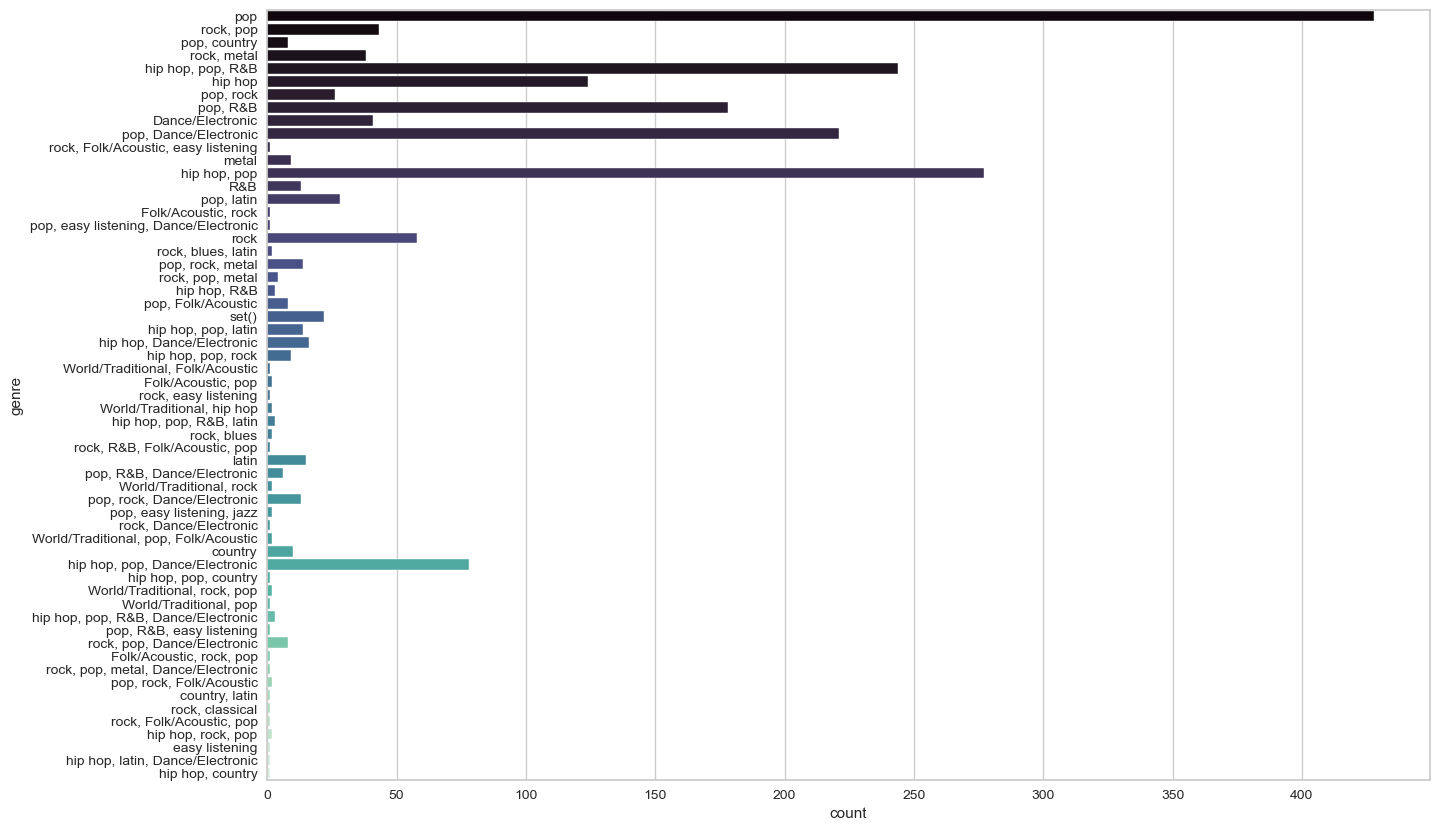

In [232]:
plt.figure(figsize=(15,10))
sns.countplot(y='genre', data=data,palette="mako")
plt.show()

On peut voir que la pop est le genre de musique le plus représenté. Il y a 7 genres très représentés. Il y a de nombreux genres très peu représentés.

On rend plus explicite les différentes tonalités et on regarde comment sont réparties les chansons en fonction de la tonalité et du mode.

In [233]:
key_mode = data.groupby(['key','mode']).size().unstack(fill_value = 0).reset_index()
key_mode.rename(columns = {0: 'minor', 1: 'major'}, inplace = True)
key_mode.key.replace({0:'C',1:'C♯/D♭',2:'D',3:'E♭/D♯',4:'E',5:'F',6:'F♯/G♭',7:'G',8:'A♭/G♯',9:'A',10:'B♭/A♯',11:'B'}, inplace=True)
key_mode

mode,key,minor,major
0,C,66,132
1,C♯/D♭,95,172
2,D,32,126
3,E♭/D♯,32,28
4,E,76,50
5,F,115,67
6,F♯/G♭,81,73
7,G,56,141
8,A♭/G♯,59,114
9,A,72,85


On constate que les chansons en majeur sont plus fréquentes dans ce dataset. De plus, certaines tonalités comme Eb sont peu repréentées, tandis que d'autres le sont davantage comme C (Do).

In [234]:
# répartition des différents types de variables
numerical_variables = ['duration_ms','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
categorical_variables = ['explicit']

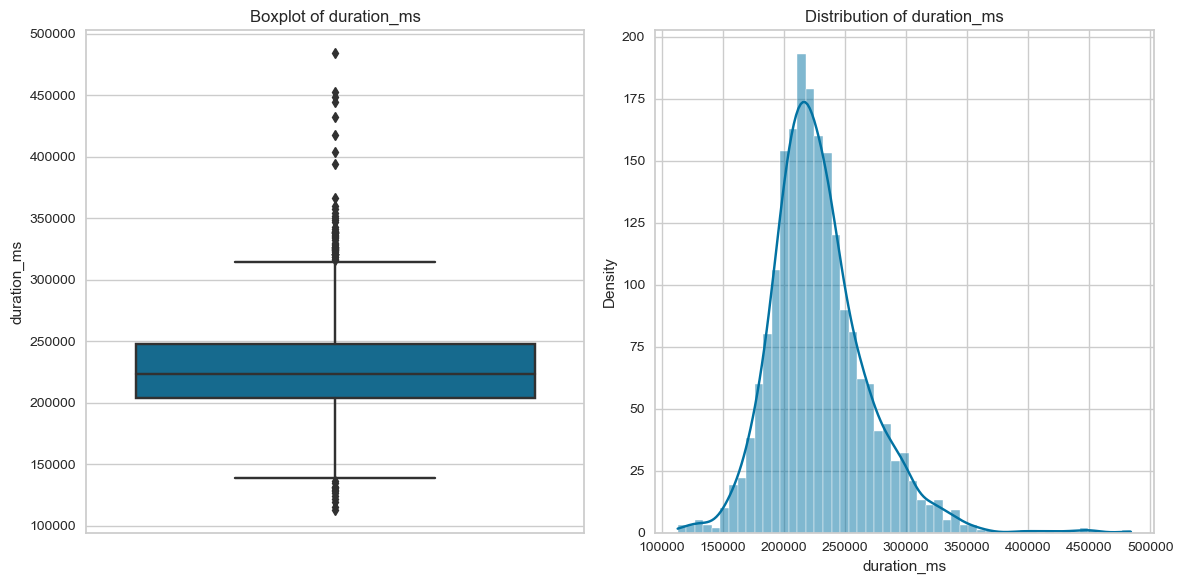

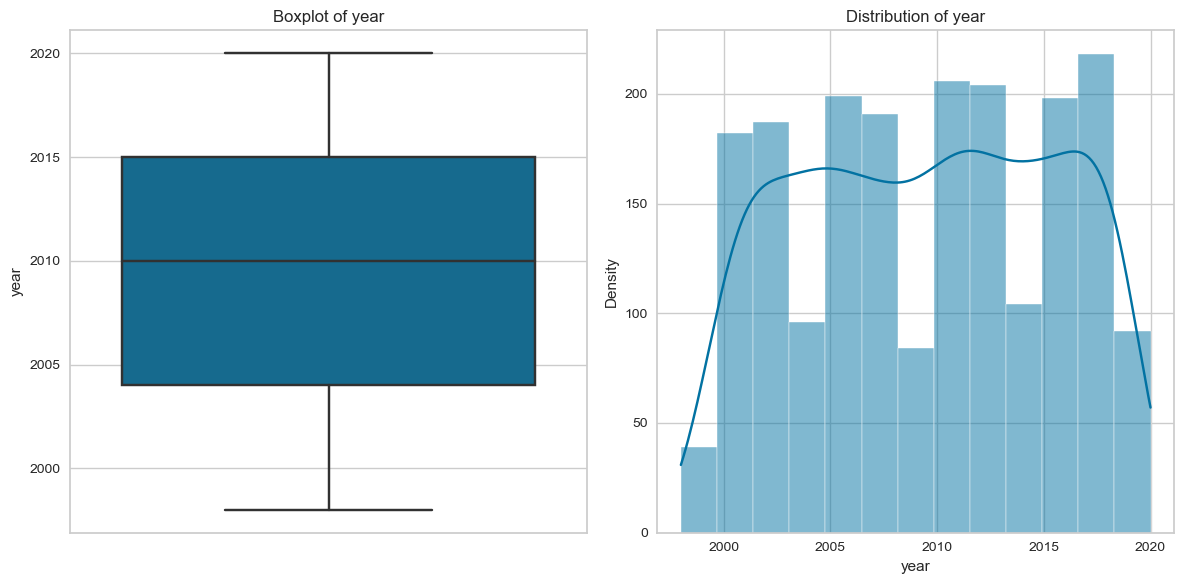

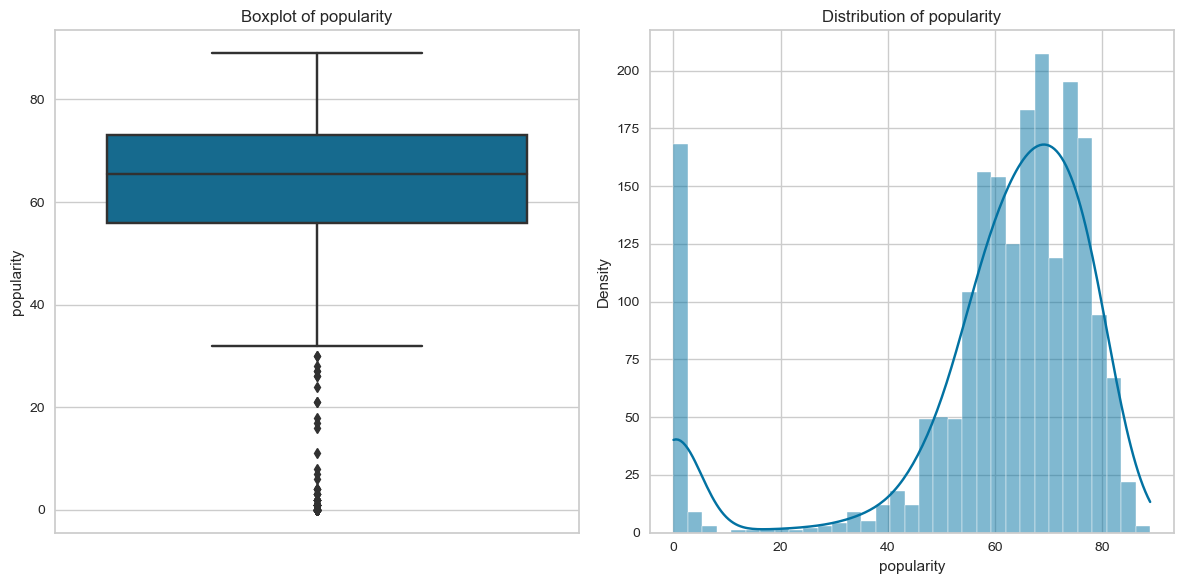

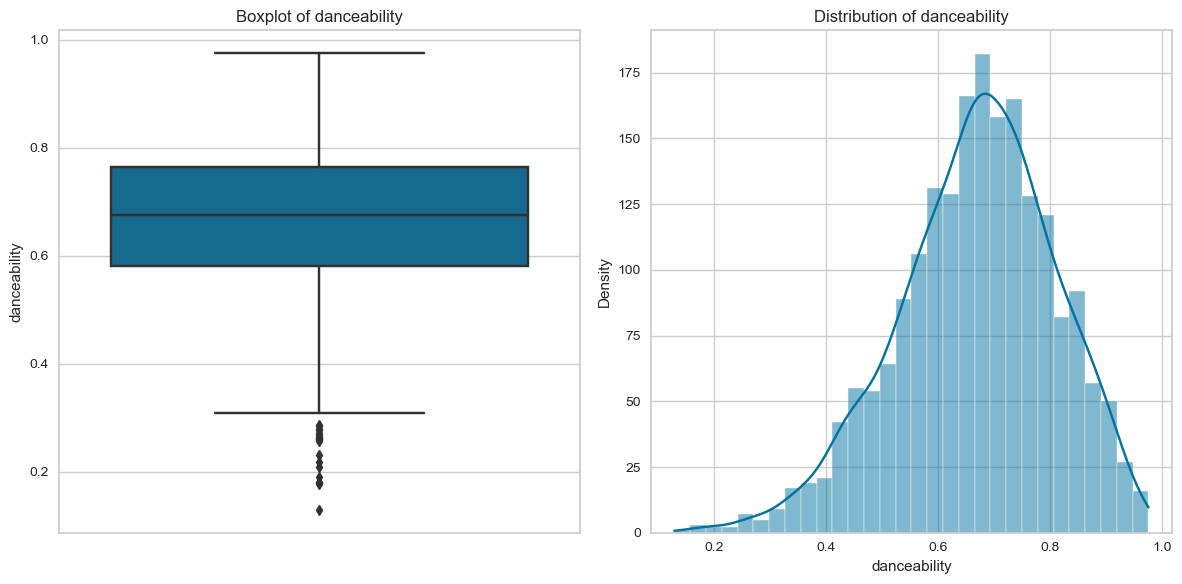

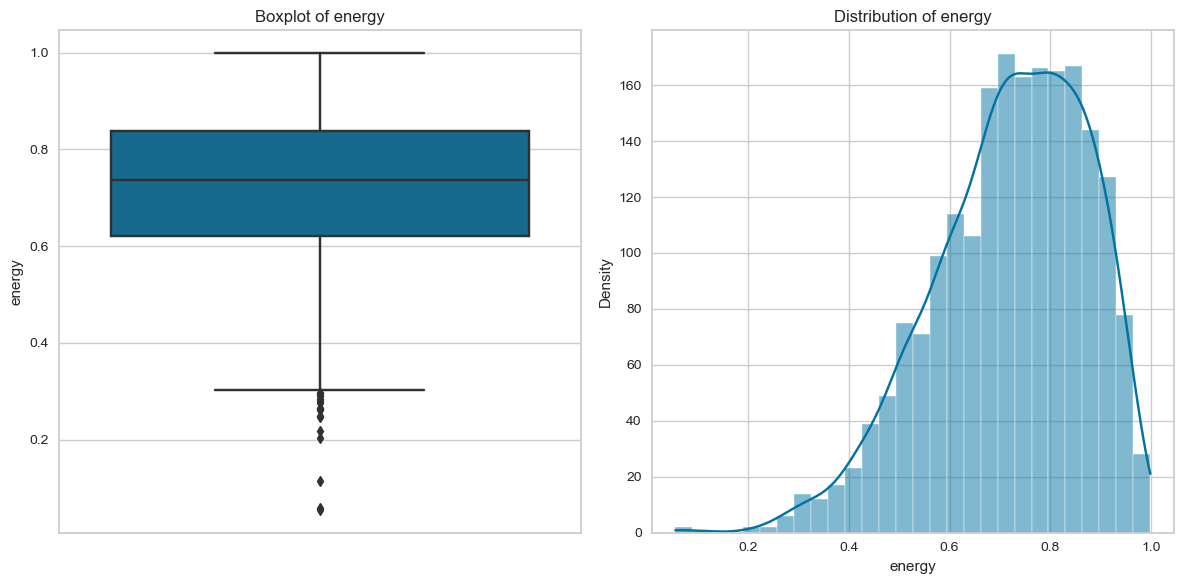

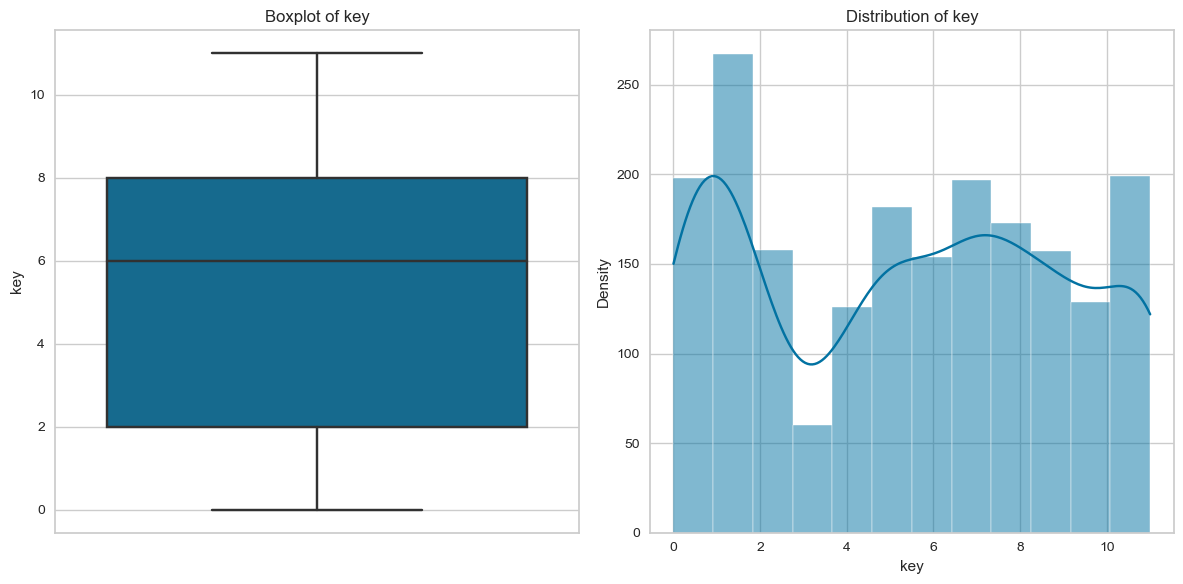

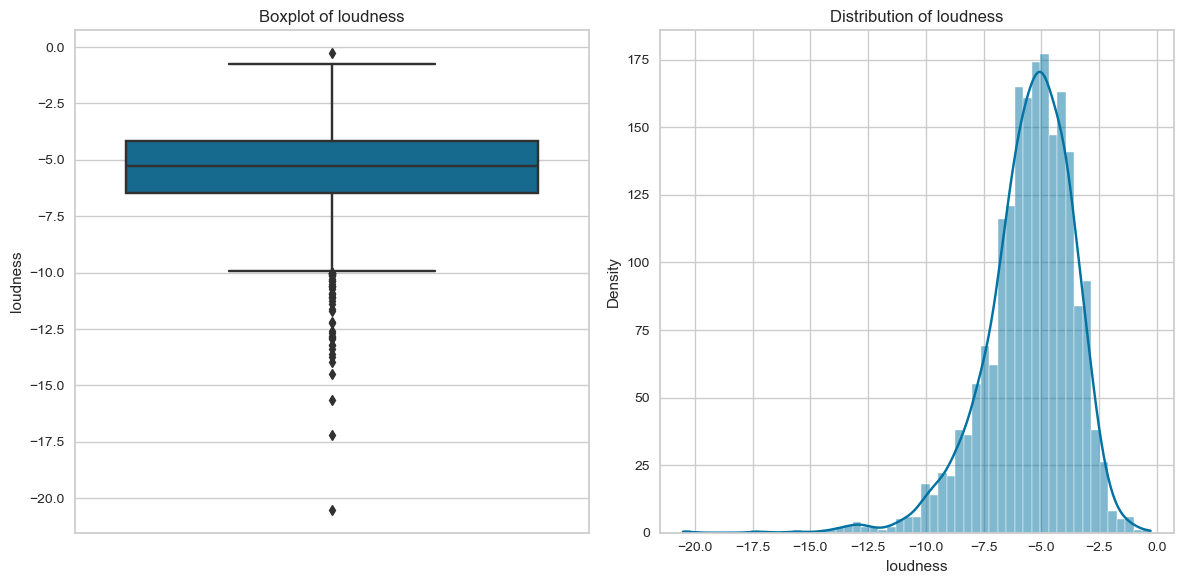

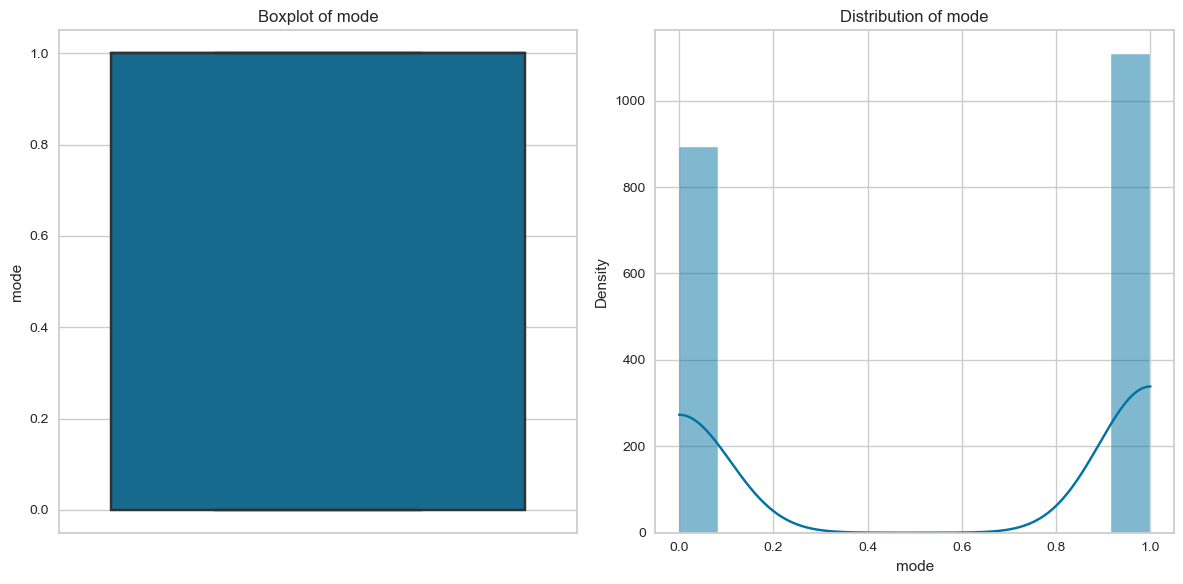

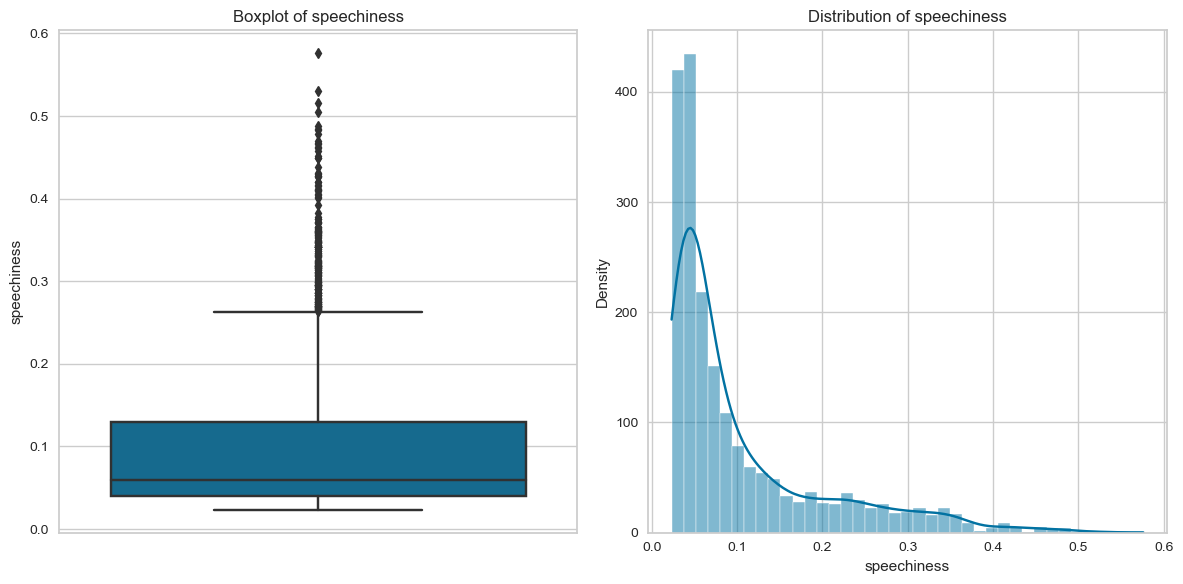

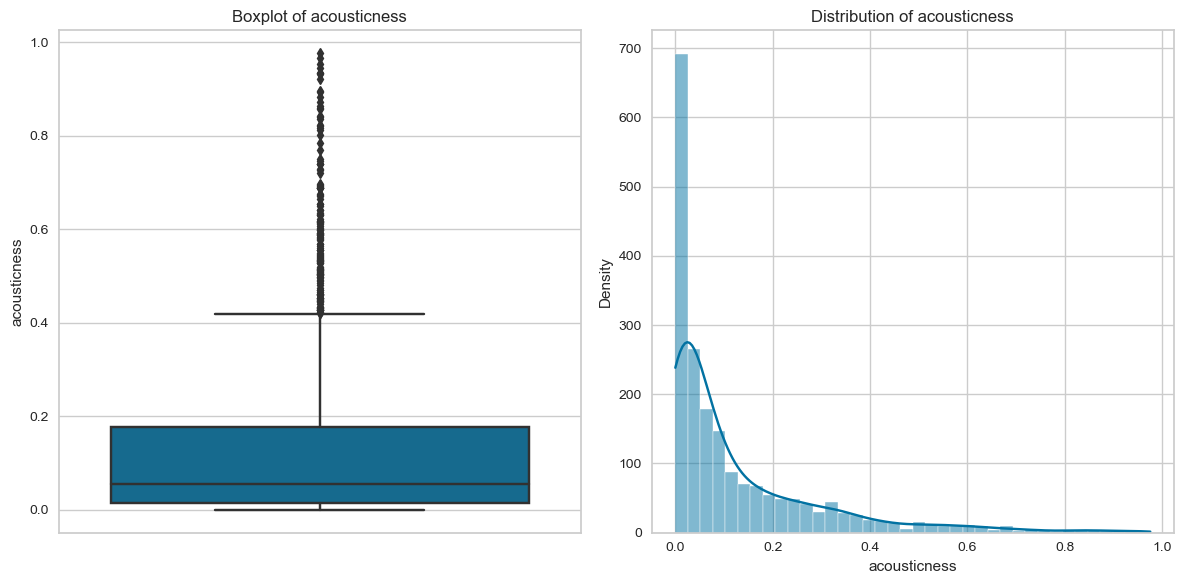

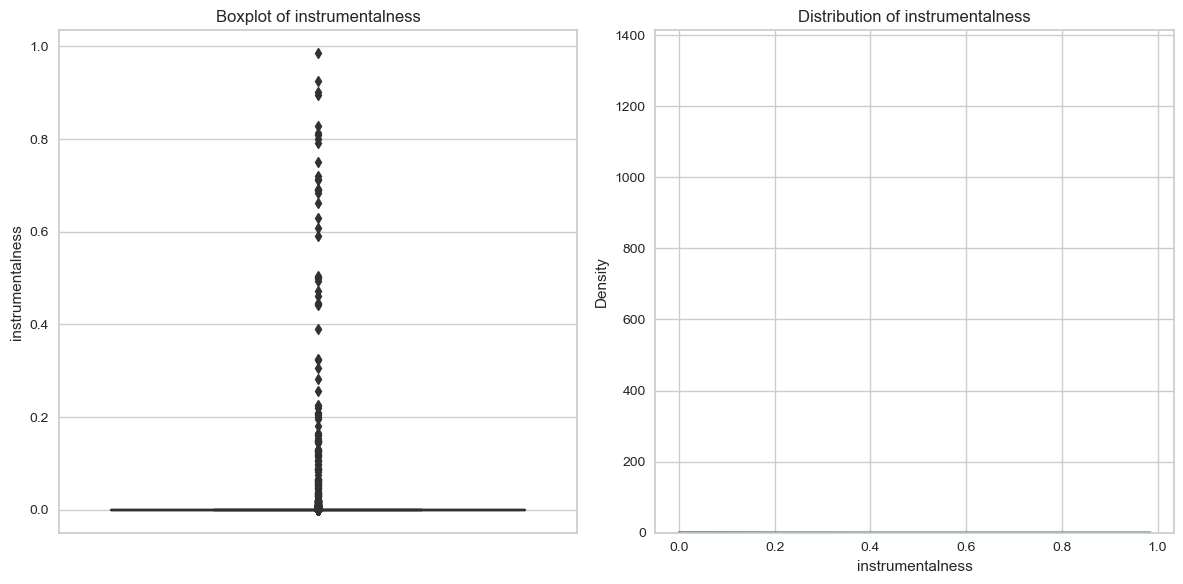

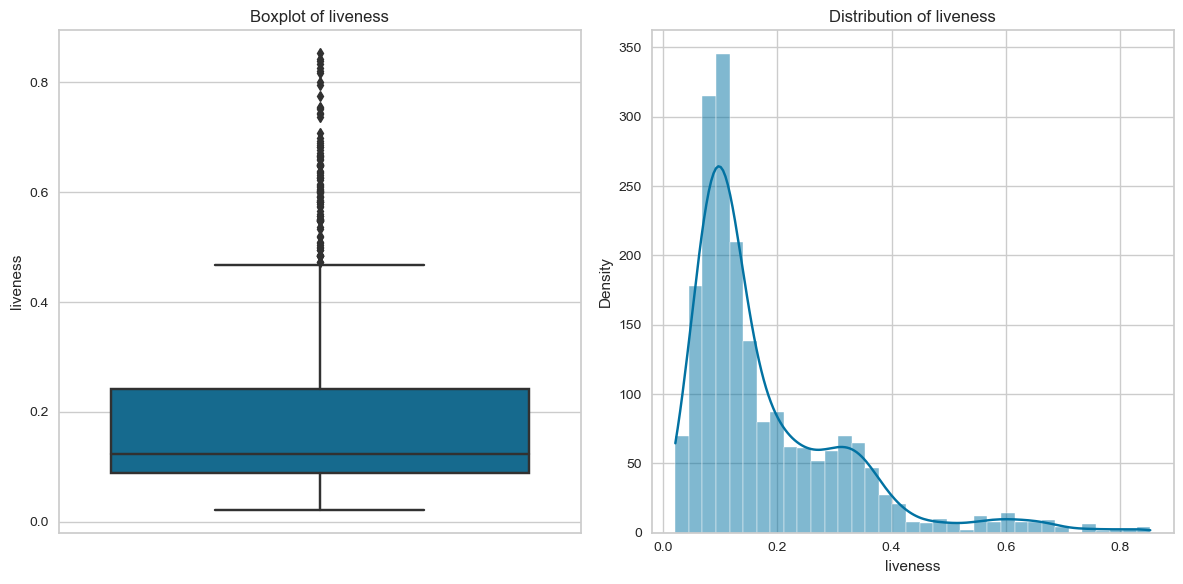

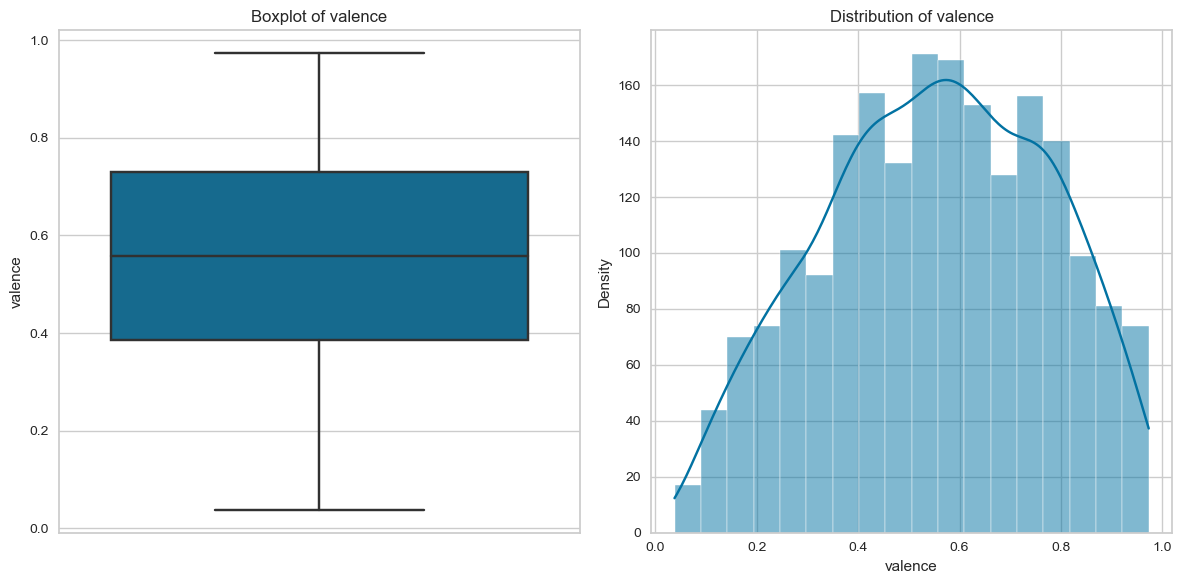

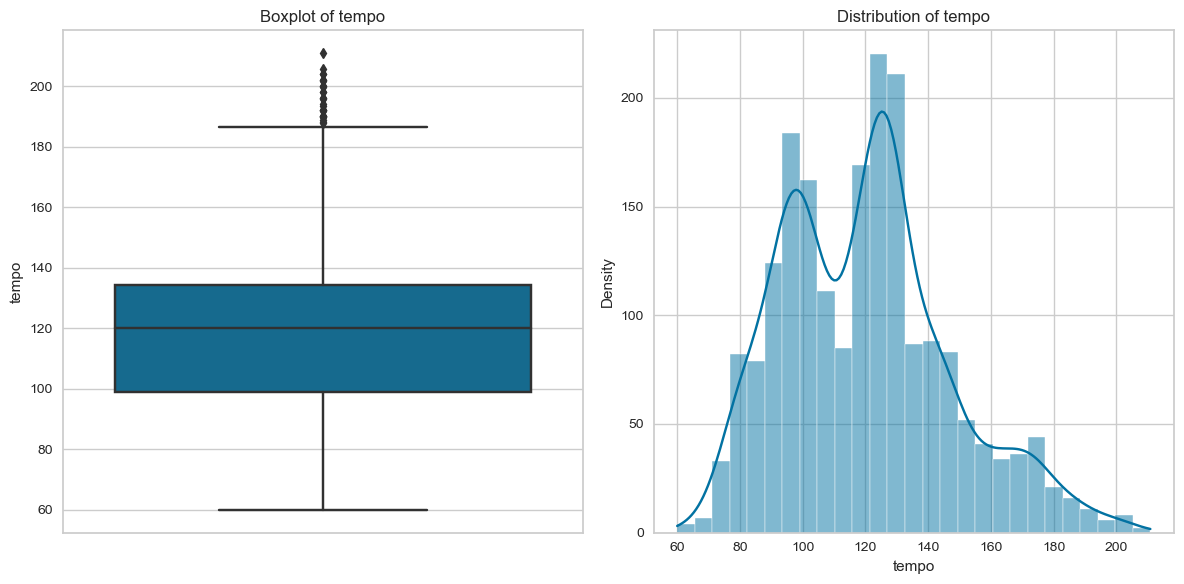

In [235]:
# plot des variables numériques
def plot_numerical_distributions(data, numerical_variables):
    for variable in numerical_variables:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, y=variable)
        plt.title(f'Boxplot of {variable}')
        plt.ylabel(variable)
        
        plt.subplot(1, 2, 2)
        sns.histplot(data[variable], kde=True)
        plt.title(f'Distribution of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Density')
        
        plt.tight_layout() 
        plt.show()

plot_numerical_distributions(data, numerical_variables)

On constate certains outliers qu'on décide de conserver. On remarque que certaines années sont plus représentées que d'autres. La majorité des chansons sont notamment populaires, ont beaucoup d'energie et ont un volume assez fort.

In [315]:
data.describe()

,duration_ms,explicit,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,0.275500,2009.49400,59.872500,0.667438,0.720366,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,0.446878,5.85996,21.335577,0.140416,0.152745,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,0.000000,1998.00000,0.000000,0.129000,0.054900,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,0.000000,2004.00000,56.000000,0.581000,0.622000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,0.000000,2010.00000,65.500000,0.676000,0.736000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,1.000000,2015.00000,73.000000,0.764000,0.839000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,1.000000,2020.00000,89.000000,0.975000,0.999000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


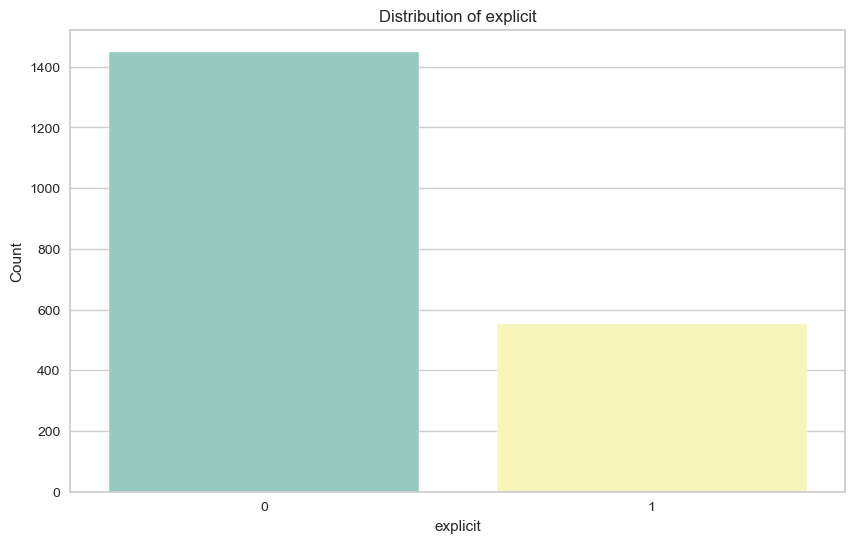

In [236]:
# plot des variables catégorielles
def plot_categorical_distributions(data, categorical_variables):
    for variable in categorical_variables:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=variable, palette='Set3')
        plt.title(f'Distribution of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Count')
        plt.show()

plot_categorical_distributions(data, categorical_variables)

La majorité des chansons ne contiennent pas de contenus explicites.

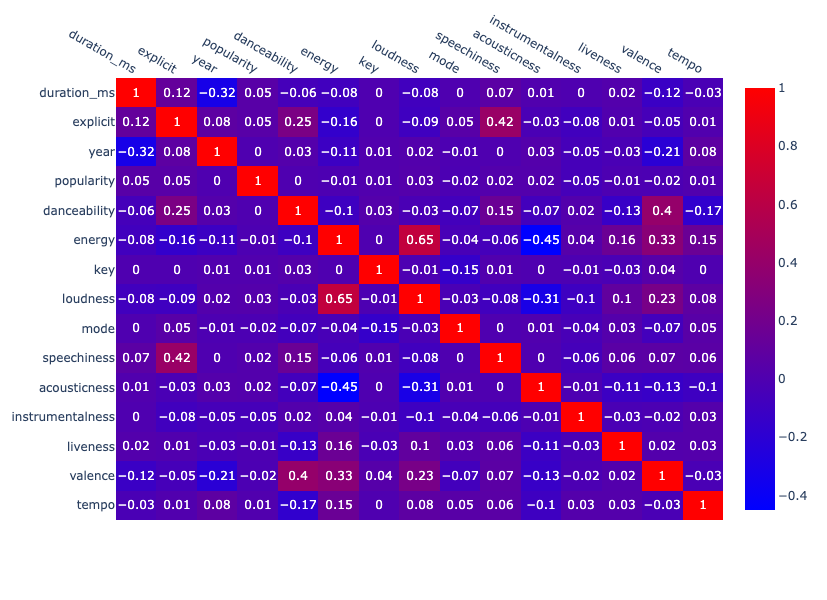

In [237]:
# Matrice de corrélation
corr_matrix = data.corr().round(2)
fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale=[(0,"blue"), (1,"red")], aspect="auto")
fig.update_layout(
    width=600,
    height=600,
)
fig.update_xaxes(side="top")
fig.show()

On peut voir loudness et energy sont positivement corrélées.
Tout comme valence et danceability.
En revanche acousticness et energy sont négativement corrélées.

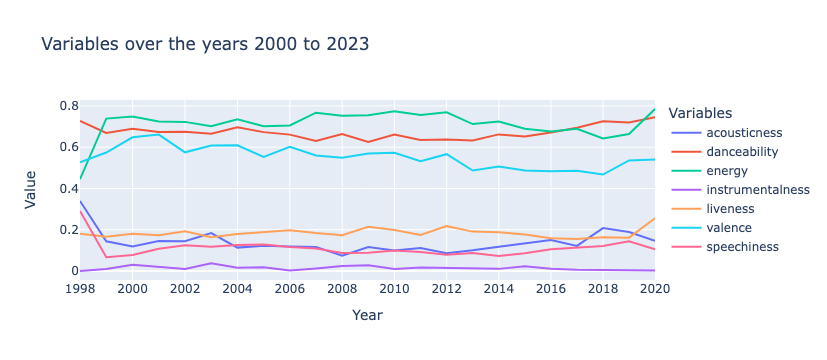

In [242]:
# on regarde la tendance de chaque variable par année
year_df = data.groupby(by=["year"]).mean().reset_index()
year_df


df_melt = year_df.melt(id_vars='year', value_vars=['acousticness', 'danceability','energy', 
         'instrumentalness', 'liveness', 'valence', 'speechiness'])

# Plot Trend of Variables over the years 2000 to 2023
px.line(df_melt, x='year' , y='value' , color='variable', labels={
                     "year": "Year",
                     "value": "Value",
                    "variable": "Variables"
                 }, log_x= True, title = 'Variables over the years 2000 to 2023' )

On voit que peu importe l'année, les chansons ont une danceability, une énergie et une valence élevées.

## Pre-processing

In [243]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Je décide de ne pas m'intéresser à la tonalité.
Je ne m'intéresse pas non plus au genre pour que le modèle ne créer pas de clusters basés sur le style de musique.

In [251]:
data = data.drop('key', axis=1)

In [252]:
# séparation des données features/infos
data_feat = data.drop(['artist', 'song', 'genre', 'year'], axis=1)
non_features = ['artist', 'song']
track_info = data[non_features]

In [253]:
track_info.head()

,artist,song
0,Britney Spears,Oops!...I Did It Again
1,blink-182,All The Small Things
2,Faith Hill,Breathe
3,Bon Jovi,It's My Life
4,*NSYNC,Bye Bye Bye


In [254]:
data_feat.head()

,duration_ms,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,0,77,0.751,0.834,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,0,79,0.434,0.897,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,0,66,0.529,0.496,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,0,78,0.551,0.913,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,0,65,0.614,0.928,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656


In [255]:
data_feat.columns.tolist()

['duration_ms',
 'explicit',
 'popularity',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [256]:
data_feat.isnull().sum()

duration_ms         0
explicit            0
popularity          0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

Il n'y a pas de valeurs nulles.

In [318]:
data_feat.shape

(1941, 13)

In [257]:
duplicates = data_feat[data_feat.duplicated()]
duplicates

,duration_ms,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
161,257200,0,60,0.682,0.744,-6.981,1,0.0365,0.376000,0.009510,0.0600,0.827,132.493
179,221133,0,65,0.730,0.602,-3.782,0,0.2060,0.362000,0.000004,0.1690,0.927,97.954
187,219093,0,60,0.558,0.481,-9.487,1,0.0260,0.315000,0.000009,0.0900,0.631,144.673
215,216880,0,83,0.556,0.864,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143
236,207866,0,55,0.761,0.662,-7.645,0,0.0548,0.292000,0.000062,0.0956,0.631,120.043
310,324306,1,68,0.648,0.759,-4.315,1,0.3060,0.014200,0.000000,0.6480,0.518,85.996
374,307879,0,79,0.577,0.749,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970
376,263226,1,70,0.884,0.677,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.584,101.868
394,257026,0,58,0.688,0.538,-7.608,1,0.0292,0.504000,0.000000,0.1110,0.270,119.998
431,239026,0,73,0.662,0.748,-3.041,0,0.2680,0.688000,0.000008,0.0841,0.535,82.331


Il y a quelques valeurs dupliquées qu'on supprime.

In [258]:
data_feat.drop_duplicates(inplace=True)

In [259]:
data_feat.shape

(1941, 13)

Les valeurs dupliquées sont bien supprimées du dataset.

On a donc 13 variables et 1941 lignes de données.

In [260]:
# normalisation des données
def normalize_column(col):
    max_d = data_feat[col].max()
    min_d = data_feat[col].min()
    data_feat[col] = (data_feat[col] - min_d)/(max_d - min_d)

In [261]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data_feat.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [262]:
data_feat.head()

,duration_ms,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.264478,0.0,0.865169,0.735225,0.825230,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272
1,0.145673,0.0,0.887640,0.360520,0.891961,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118
2,0.370598,0.0,0.741573,0.472813,0.467217,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441
3,0.300402,0.0,0.876404,0.498818,0.908908,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615
4,0.235918,0.0,0.730337,0.573286,0.924796,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771


Les données sont bien normalisées.

## Modélisation

In [263]:
# train test split

track_info = data[non_features]

X_train, X_test = train_test_split(data_feat, test_size=0.3)
X_train.shape, X_test.shape

track_info_train = track_info.loc[X_train.index]
track_info_test = track_info.loc[X_test.index]

In [264]:
X_train.head()

,duration_ms,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
916,0.334424,0.0,0.662921,0.822695,0.728842,0.717413,1.0,0.227569,0.014530,0.000022,0.259170,0.814953,0.444375
576,0.163494,0.0,0.797753,0.479905,0.945980,0.806601,0.0,0.022431,0.002286,0.000000,0.426338,0.791422,0.286173
377,0.258982,0.0,0.730337,0.686761,0.786040,0.865105,0.0,0.063314,0.418021,0.000000,0.166566,0.867365,0.231907
1463,0.168198,0.0,0.921348,0.698582,0.779684,0.781945,1.0,0.182344,0.039325,0.000000,0.162959,0.767890,0.278800
1372,0.290134,0.0,0.685393,0.679669,0.662112,0.778881,1.0,0.063133,0.006026,0.000000,0.230307,0.696224,0.424008


In [265]:
track_info_train.head()

,artist,song
916,Pitbull,I Know You Want Me (Calle Ocho)
576,Arctic Monkeys,I Bet You Look Good On The Dancefloor
377,Ashanti,Rock Wit U (Awww Baby)
1463,MKTO,Classic
1372,The Saturdays,What About Us


On fait une PCA pour réduire les dimensions.

In [275]:
pca = PCA()
pca.fit(X_train)

PCA()

On trace maintenant la variance cumulée.

In [276]:
evr = pca.explained_variance_ratio_
evr

array([0.32730009, 0.26450338, 0.09380553, 0.08001112, 0.05994353,
       0.03965152, 0.03438427, 0.02958575, 0.02477193, 0.01595741,
       0.01403436, 0.01080832, 0.00524279])

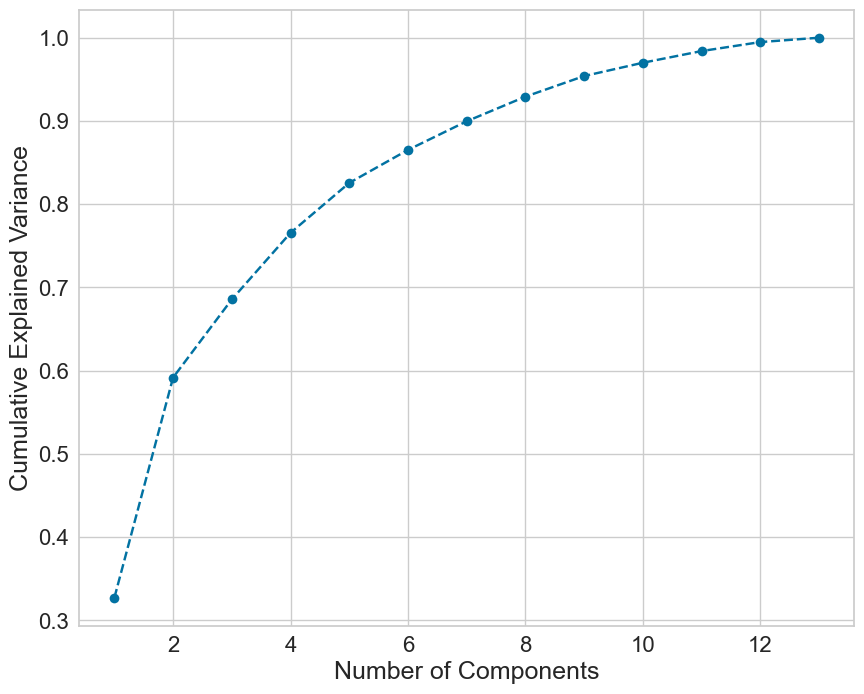

In [277]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(X_train.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

On souhaite conserver au moins 80% de la variance :

In [279]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_train)
scores_pca = pca.transform(X_train)

Number of components: 5


On choisit donc 5 composantes.

#### K-Means clustring

Trouver le nombre optimal de clusters en identifiant le point de coude dans la courbe WCSS.

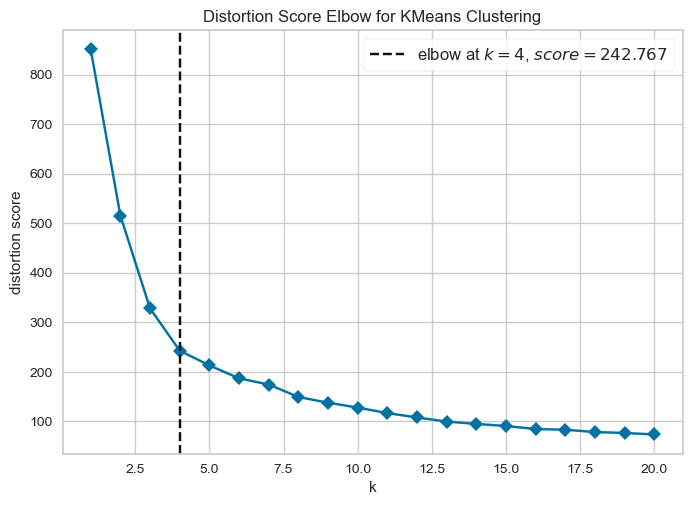

Optimal number of clusters: 4


In [284]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False) #k=(1,201)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

In [283]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 4


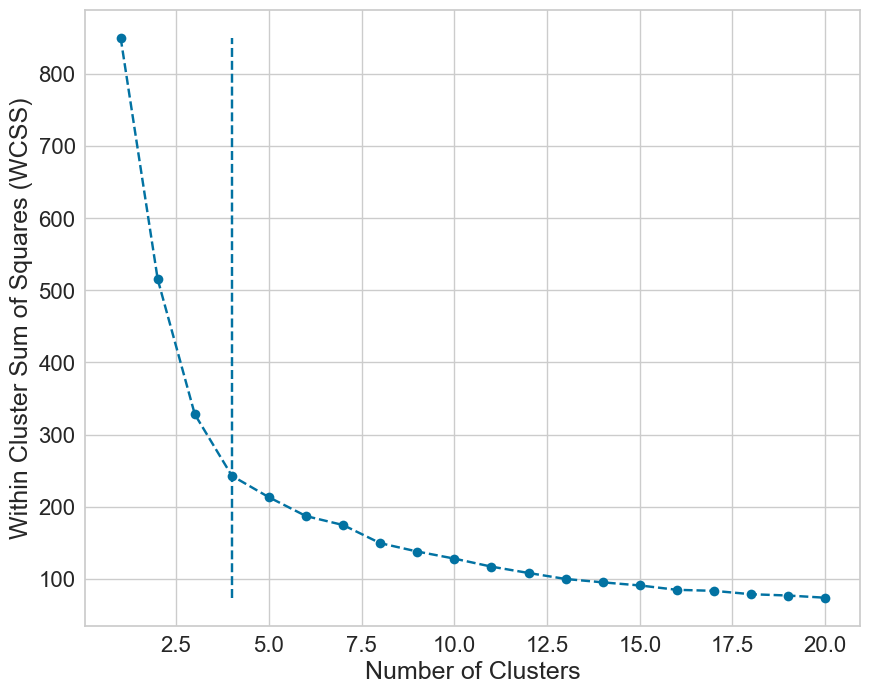

In [285]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Effectuer le K-means.

Initialisation de l'algorithme K-means avec le nombre de clusters souhaité (n_clusters) en utilisant l'initialisation k-means++.

In [286]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42) 
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

On combine les données d'entrainement avec les composantes de la PCA et on rajoute une colonne Cluster.

In [287]:
df_seg_pca_kmeans = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,duration_ms,explicit,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster
0,0.334424,0.0,0.662921,0.822695,0.728842,0.717413,1.0,0.227569,0.014530,0.000022,0.259170,0.814953,0.444375,-0.361863,-0.293011,-0.348367,-0.005260,0.056521,2
1,0.163494,0.0,0.797753,0.479905,0.945980,0.806601,0.0,0.022431,0.002286,0.000000,0.426338,0.791422,0.286173,0.625094,-0.219329,-0.238871,-0.128047,-0.184646,1
2,0.258982,0.0,0.730337,0.686761,0.786040,0.865105,0.0,0.063314,0.418021,0.000000,0.166566,0.867365,0.231907,0.631030,-0.178373,-0.200751,-0.058100,0.276397,1
3,0.168198,0.0,0.921348,0.698582,0.779684,0.781945,1.0,0.182344,0.039325,0.000000,0.162959,0.767890,0.278800,-0.355294,-0.319433,-0.291953,-0.263252,0.098761,2
4,0.290134,0.0,0.685393,0.679669,0.662112,0.778881,1.0,0.063133,0.006026,0.000000,0.230307,0.696224,0.424008,-0.369539,-0.334129,-0.184321,-0.026520,0.011886,2


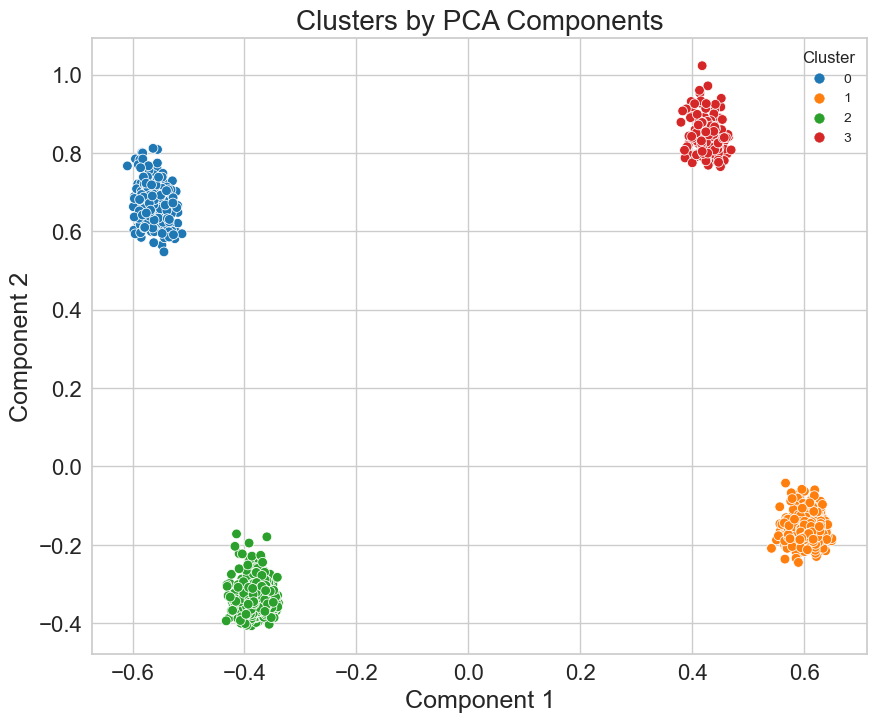

In [319]:
# scatter plot pour visualiser les clusters
x = df_seg_pca_kmeans['Component 1'] #1
y = df_seg_pca_kmeans['Component 2'] #2

fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, hue=df_seg_pca_kmeans['Cluster'], palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])

plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

On peut voir qu'il y a 4 clusters différents qui ont chacun une couleur différente.

In [320]:
# calcul score de silhouette pour évaluer la qualité des clusters
silhouette_avg = silhouette_score(X_train, kmeans_pca.labels_)
silhouette_avg

0.4101468137386802

Le score est de 0.41. Plus le score est proche de 1, plus les clusters sont séparés.

On calcule le score de Davies Bouldin.

In [321]:
db_score = davies_bouldin_score(X_train, kmeans_pca.labels_)
db_score

1.069916746535033

On obtient un score de 1,06. Cela indique une certaine similarité entre les clusters, mais qui reste acceptable.

On voit que les données sont bien séparées sauf quand on croise les composantes 3, 4 et 5.

On regarde la position des centroids et on l'ajuste. On calcule à nouveau les score de silhouette et de Davies Bouldin.

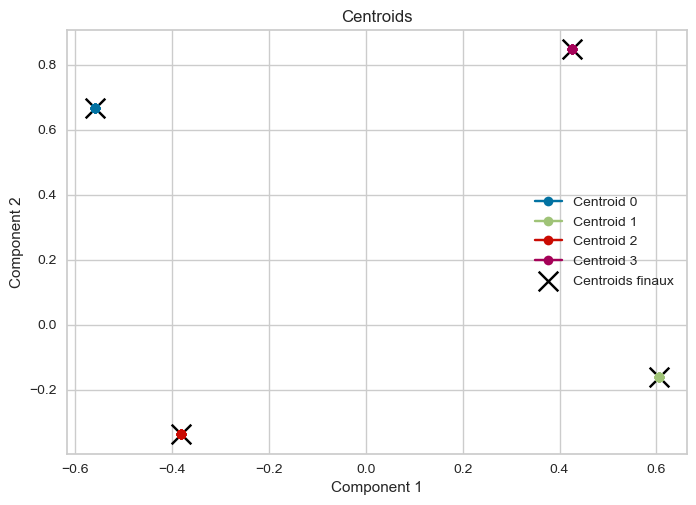

Silhouette: 0.538370608109929
Davies-Bouldin: 0.7497615460562164


In [326]:
# Nombre d'itérations pour ajuster les centroids
num_iterations = 10

centroid_history = []

for _ in range(num_iterations):
    kmeans_pca.fit(scores_pca)
    centroid_history.append(kmeans_pca.cluster_centers_)

centroid_history = np.array(centroid_history)
for i in range(n_clusters):
    plt.plot(centroid_history[:, i, 0], centroid_history[:, i, 1], marker='o', label=f'Centroid {i}')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='black', marker='x', s=200, label='Centroids finaux')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Centroids')
plt.legend()
plt.show()

# silhouette score
silhouette_avg = silhouette_score(scores_pca, kmeans_pca.labels_)
print("Silhouette:", silhouette_avg)

# davies bouldin score
db_score = davies_bouldin_score(scores_pca, kmeans_pca.labels_)
print("Davies-Bouldin:", db_score)

On peut voir que les scores sont meilleurs maintenant.

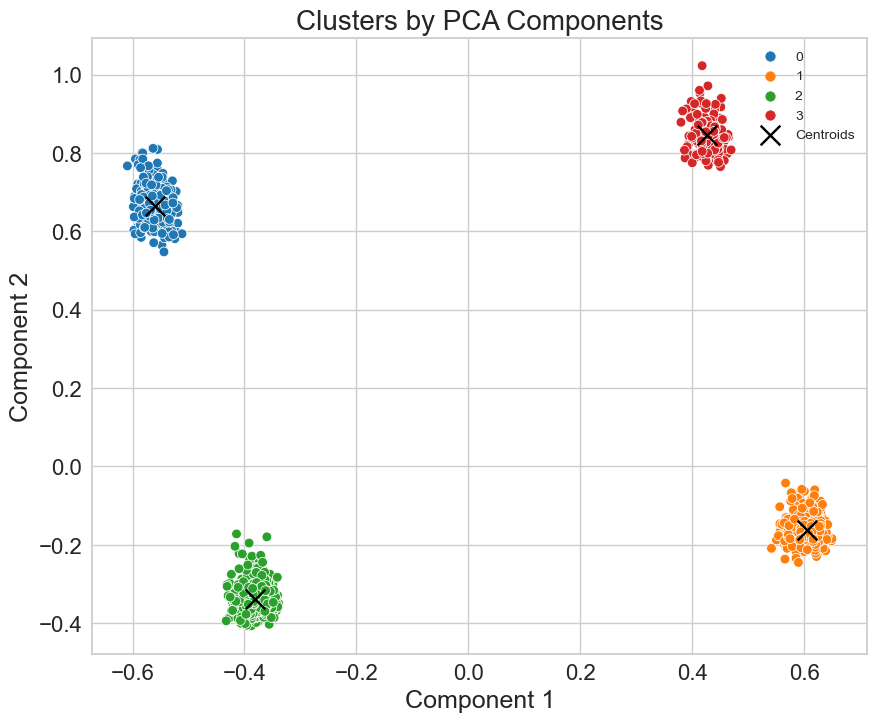

In [327]:
# graphique avec les composantes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, hue=df_seg_pca_kmeans['Cluster'], palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# centroids
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='black', marker='x', s=200, label='Centroids')

plt.legend()
plt.show()


On regarde avec les données test.

In [324]:
# PCA sur données de test
X_test_pca = pca.transform(X_test) 

# K-means sur données de test réduites
test_cluster_labels = kmeans_pca.predict(X_test_pca)  

In [325]:
# Silhouette Score sur les données de test
silhouette_avg_test = silhouette_score(X_test, test_cluster_labels)
print("Silhouette (Test):", silhouette_avg_test)

# Davies-Bouldin Score sur les données de test
db_score_test = davies_bouldin_score(X_test, test_cluster_labels)
print("Davies-Bouldin (Test):", db_score_test)

Silhouette (Test): 0.41425773804678473
Davies-Bouldin (Test): 1.0367003658381169


Les scores correspondent à peu près à ceux obtenus avec les données d'entrainement.

In [395]:
# df avec étiquettes de cluster et informations sur les chansons
clustered_tracks = pd.concat([track_info_train.reset_index(drop=True), df_seg_pca_kmeans['Cluster']], axis=1)

# recommandations
class SpotifyRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data
    
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    def get_recommendations(self, song_name, amount=5):
        distances = []
        song = self.rec_data_[(self.rec_data_.song.str.lower() == song_name.lower())].head(1).values[0]
        res_data = self.rec_data_[self.rec_data_.song.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    try:
                        dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
                    except ValueError:
                        
                        dist = float('inf') 
            distances.append(dist)
        res_data['distance'] = distances
        res_data = res_data.sort_values('distance')
        columns = ['artist', 'song']
        
       
        res_data['Cluster'] = self.rec_data_[(self.rec_data_.song.str.lower() == song_name.lower())]['Cluster'].values[0]
        
      
        cluster_songs = res_data[res_data['Cluster'] == res_data['Cluster'].iloc[0]]
        
        
        random_songs = cluster_songs.sample(n=amount)
        
       
        random_songs = random_songs[['artist', 'song', 'Cluster']]
        
        return random_songs


recommender = SpotifyRecommender(clustered_tracks)

chanson_entree = input("Entrez une chanson : ")
recommandations = recommender.get_recommendations(chanson_entree, amount=5)

print("Recommandations similaires:")
print(recommandations)

Entrez une chanson :  Just Dance


100%|██████████| 1357/1357 [00:00<00:00, 58943.78it/s]

Recommandations similaires:
                       artist                              song  Cluster
223              Zara Larsson                         Lush Life        1
1035           George Michael                           Amazing        1
715                   Rihanna                     We Found Love        1
306   Macklemore & Ryan Lewis  Can't Hold Us (feat. Ray Dalton)        1
459                Marshmello                             Alone        1


Bien qu'il n'y ait que 4 clusters, les recommandations sont plutôt pertinentes.

### Analyse des clusters

On regarde les chansons contenues dans les différents clusters.

In [299]:
clustered_tracks_grouped = clustered_tracks.groupby('Cluster')
cluster_song_lists = {}

for cluster, group in clustered_tracks_grouped:
    song_artist_list = group[['song', 'artist']].values.tolist() 
    cluster_song_lists[cluster] = song_artist_list

for cluster, song_artist_list in cluster_song_lists.items():
    print(f'Cluster {cluster} Songs:')
    for song, artist in song_artist_list:
        print(f'* {song} - {artist}')
    print()

Cluster 0 Songs:
* My Happy Ending - Avril Lavigne
* Gimme the Light - Sean Paul
* Look Alive (feat. Drake) - BlocBoy JB
* Nice For What - Drake
* Man Of The Year - ScHoolboy Q
* Kiss Me Thru The Phone - Soulja Boy
* I Tried - Bone Thugs-N-Harmony
* 'Till I Collapse - Eminem
* SICKO MODE - Travis Scott
* Hot Girl Summer (feat. Nicki Minaj & Ty Dolla $ign) - Megan Thee Stallion
* Not Fair - Lily Allen
* F**kin' Problems (feat. Drake, 2 Chainz & Kendrick Lamar) - A$AP Rocky
* Ride - Lana Del Rey
* Dangerous - Kardinal Offishall
* In My Feelings - Drake
* LoveStoned / I Think She Knows (Interlude) - Justin Timberlake
* Passionfruit - Drake
* Work B**ch - Britney Spears
* Rack City - Tyga
* Pass Out - Tinie Tempah
* The Jump Off (feat. Mr. Cheeks) - Remix - Lil' Kim
* GUMMO - 6ix9ine
* Oh Boy - Cam’ron
* Him & I - G-Eazy
* On Fire - Lloyd Banks
* Taste (feat. Offset) - Tyga
* Swang - Rae Sremmurd
* DNA. - Kendrick Lamar
* Work - Rihanna
* How We Do (Party) - Rita Ora
* Heaven Is a Halfpipe

La répartition des chansons/artistes dans les clusters semble assez cohérente.

On regarde le nombre de chanson par artiste dans chaque cluster.

In [300]:
cluster_artist_counts = {}

for cluster, group in clustered_tracks_grouped:
    artist_counts = group['artist'].value_counts().to_dict()  
    cluster_artist_counts[cluster] = artist_counts

for cluster, artist_counts in cluster_artist_counts.items():
    print(f'Cluster {cluster} - Nombre de chansons par artiste:')
    for artist, count in artist_counts.items():
        print(f'- {artist}: {count} chansons')
    print()

Cluster 0 - Nombre de chansons par artiste:
- Drake: 8 chansons
- Eminem: 7 chansons
- Kanye West: 6 chansons
- Ludacris: 5 chansons
- Kendrick Lamar: 4 chansons
- JAY-Z: 4 chansons
- 50 Cent: 3 chansons
- Chris Brown: 3 chansons
- P!nk: 3 chansons
- Migos: 3 chansons
- Tyga: 3 chansons
- Missy Elliott: 3 chansons
- The Weeknd: 3 chansons
- Rae Sremmurd: 3 chansons
- Nicki Minaj: 3 chansons
- Post Malone: 3 chansons
- Nelly: 3 chansons
- Waka Flocka Flame: 2 chansons
- Fetty Wap: 2 chansons
- T-Pain: 2 chansons
- The-Dream: 2 chansons
- Avril Lavigne: 2 chansons
- 6ix9ine: 2 chansons
- G-Eazy: 2 chansons
- Maroon 5: 2 chansons
- Chingy: 2 chansons
- Ying Yang Twins: 2 chansons
- J. Cole: 2 chansons
- Travis Scott: 2 chansons
- Dr. Dre: 2 chansons
- ScHoolboy Q: 2 chansons
- Offset: 2 chansons
- Snoop Dogg: 2 chansons
- Busta Rhymes: 1 chansons
- Jessie J: 1 chansons
- Juice WRLD: 1 chansons
- Russ Millions: 1 chansons
- Rich Boy: 1 chansons
- NLE Choppa: 1 chansons
- D12: 1 chansons
- 

Plusieurs artistes ont plusieurs de leurs chansons dans un même cluster. Toutefois le nombre de chanson dans chaque cluster rend complexe l'analyse des clusters sans visualisation.

In [301]:
# Utilisez la méthode value_counts() pour compter le nombre de chansons dans chaque cluster
cluster_counts = clustered_tracks['Cluster'].value_counts()

# Affichez le nombre de chansons dans chaque cluster
print("Nombre de chansons dans chaque cluster :")
print(cluster_counts)


Nombre de chansons dans chaque cluster :
2    557
1    448
0    212
3    141
Name: Cluster, dtype: int64


On constate que les clusters n'ont pas tous la même taille.

In [302]:
def find_artist_clusters_and_counts(artist_name):
    artist_data = clustered_tracks[clustered_tracks['artist'].str.lower() == artist_name.lower()]
    
    if artist_data.empty:
        return f"L'artiste '{artist_name}' n'a pas été trouvé dans le DataFrame."
    clusters_counts = {}
    
    for index, row in artist_data.iterrows():
        cluster = row['Cluster']
        if cluster in clusters_counts:
            clusters_counts[cluster] += 1
        else:
            clusters_counts[cluster] = 1
    
    summary_table = pd.DataFrame(list(clusters_counts.items()), columns=['Cluster', 'Nombre de chansons'])
    
    return summary_table

artiste_entree = input("Entrez le nom de l'artiste : ")
resultat = find_artist_clusters_and_counts(artiste_entree)
print("Récapitulatif des clusters pour l'artiste :", artiste_entree)
print(resultat)

Entrez le nom de l'artiste :  Rihanna


Récapitulatif des clusters pour l'artiste : Rihanna
   Cluster  Nombre de chansons
0        3                   3
1        0                   1
2        2                   5
3        1                   5


On regarde maintenant les caractéristiques des clusters.

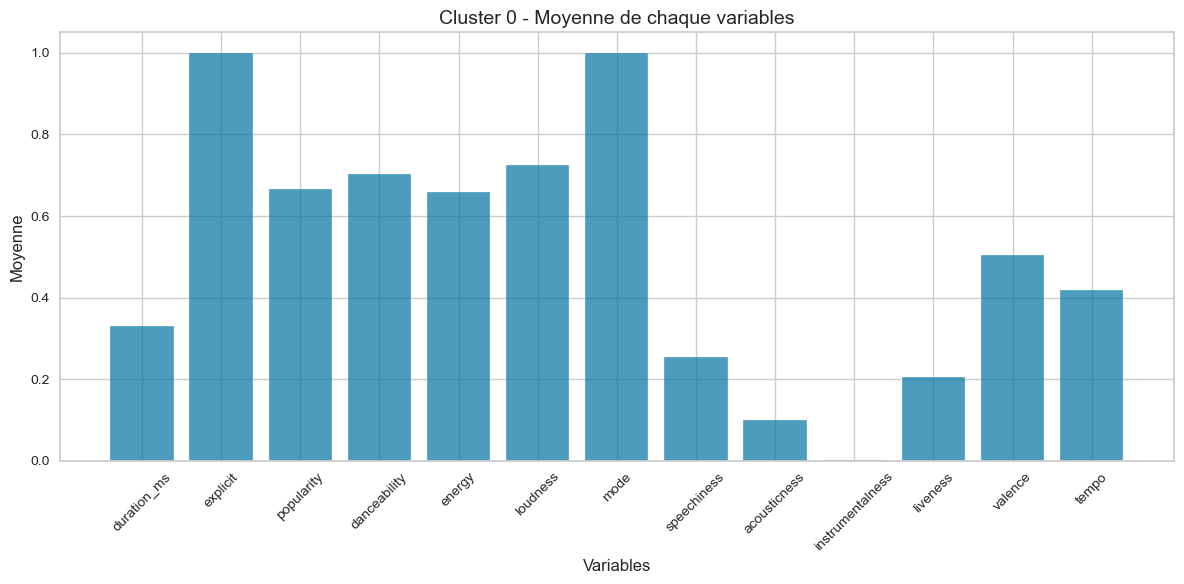

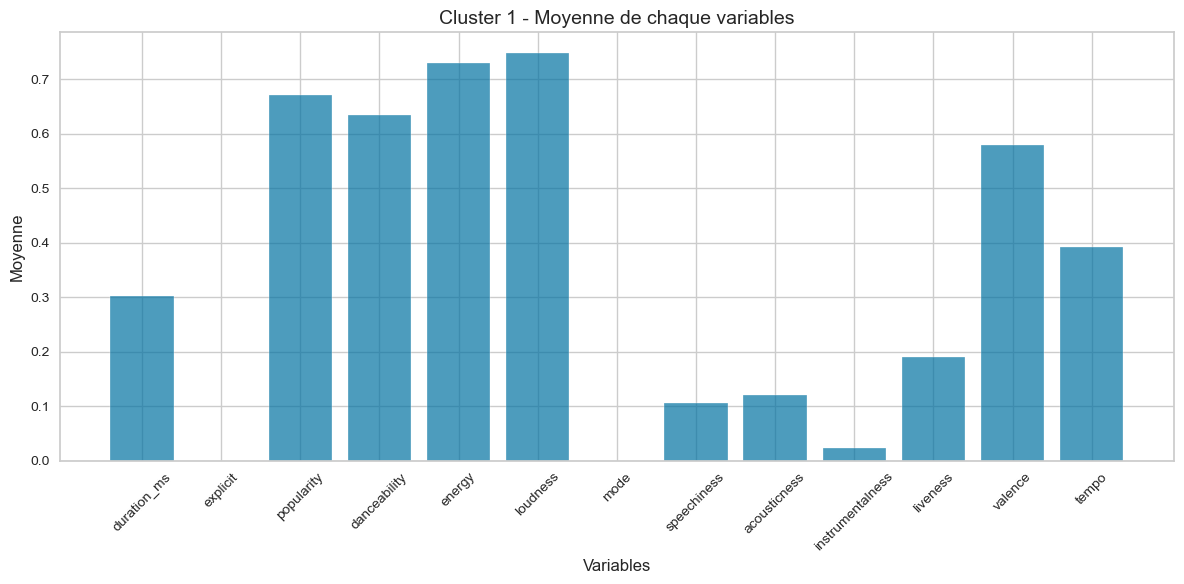

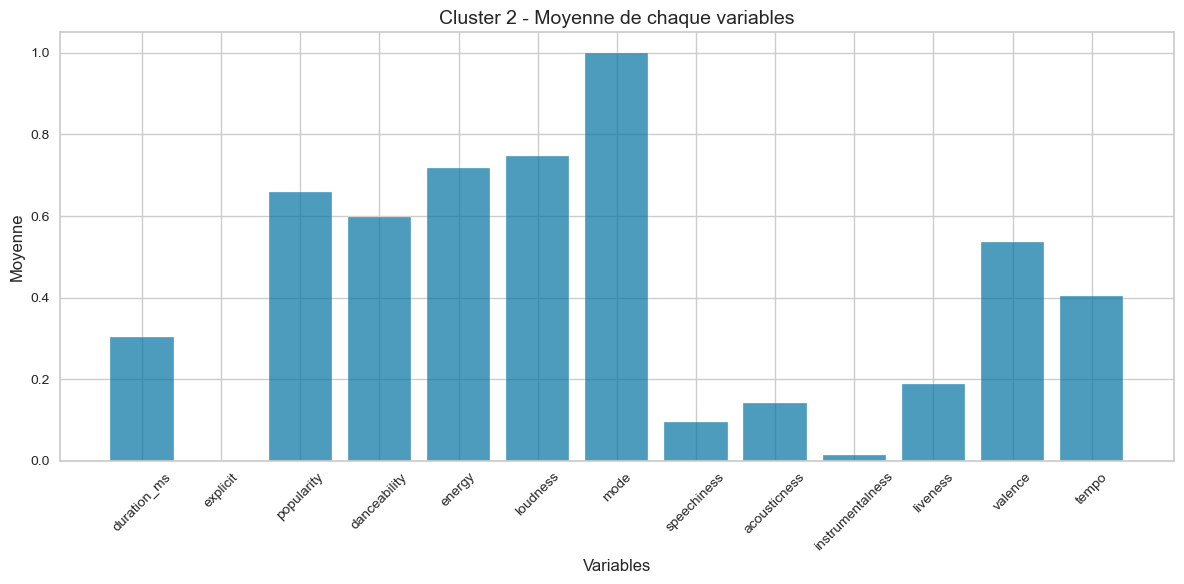

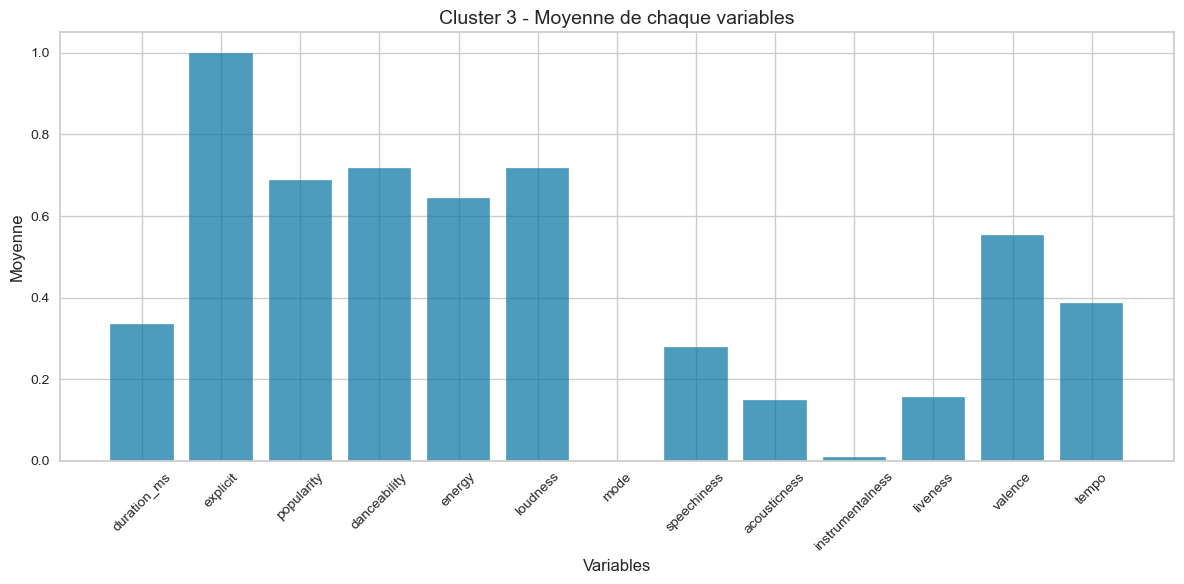

In [396]:
clusters = [i for i in range(4)]

features = X_train.columns  

for cluster in clusters:
    plt.figure(figsize=(12, 6))
    cluster_data = X_train.reset_index(drop=True)
    cluster_data = cluster_data[df_seg_pca_kmeans['Cluster'] == cluster]
    
    means = cluster_data.mean()
    
    x = range(len(features))
    
    y = means.values
    
    labels = features
    
    plt.bar(x, y, tick_label=labels, alpha=0.7)
    plt.xlabel('Variables', fontsize=12)
    plt.ylabel('Moyenne', fontsize=12)
    plt.title(f'Cluster {cluster} - Moyenne de chaque variables', fontsize=14)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Cluster 1 :

Ce cluster semble être caractérisé par des chansons qui sont généralement joyeuses et énergiques, avec une haute danceabilité et une forte popularité.
Les chansons sont majoritairement en mode majeur.
Elles contiennent des paroles ou du contenu explicite.
Le tempo est modéré.
Les chansons ont tendance à avoir une valence moyennement positive.


Cluster 2 :

Les chansons de ce cluster sont également énergiques et populaires, mais elles sont en majorité en mode mineur.
Elles ne contiennent pas de paroles explicites.
Le tempo est modéré.
Les chansons ont une valence moyennement positive.
Certains aspects de la musicalité, tels que la danceabilité, l'énergie et le loudness, sont élevés.

Cluster 3 :

Ce cluster est composé de chansons énergiques et populaires, majoritairement en mode majeur.
Elles n'ont pas de paroles explicites.
Le tempo est modéré.
Les chansons ont une valence moyennement positive, mais légèrement moins que celles du Cluster 1 et 2.
Il y a une présence un peu plus forte de paroles parlées et d'éléments acoustiques.

Cluster 4 :

Les chansons de ce cluster sont aussi énergiques et populaires, majoritairement en mode mineur.
Elles contiennent des paroles explicites.
Le tempo est modéré.
Les chansons ont une valence modérément positive.
Certaines caractéristiques, comme la danceabilité et le loudness, sont élevées.
Il y a une présence modérée de paroles parlées.

In [304]:
# s'intéresser aux charges des variables
component_loadings = pca.components_

loadings_df = pd.DataFrame(component_loadings, columns=X_train.columns, index=[f'Component {i+1}' for i in range(len(component_loadings))])

print("Charges des variables pour chaque composante principale:")
print(loadings_df)

Charges des variables pour chaque composante principale:
             duration_ms  explicit  popularity  danceability    energy  \
Component 1    -0.006284 -0.173631    0.016338      0.019817  0.023644   
Component 2     0.029643  0.956294    0.020091      0.112305 -0.079159   
Component 3     0.061847 -0.011862    0.003128     -0.316430 -0.331186   
Component 4    -0.004865  0.015936   -0.998067      0.009592 -0.032855   
Component 5    -0.008808 -0.069505    0.030058      0.338199 -0.444618   

             loudness      mode  speechiness  acousticness  instrumentalness  \
Component 1  0.006301 -0.981405    -0.016885     -0.003634          0.011718   
Component 2 -0.031744 -0.173343     0.183341     -0.007610         -0.012091   
Component 3 -0.131855 -0.069007    -0.063324      0.267465         -0.008524   
Component 4 -0.031613 -0.018619    -0.015124     -0.011699          0.011134   
Component 5 -0.178524  0.036729    -0.001780      0.515628         -0.008991   

             live

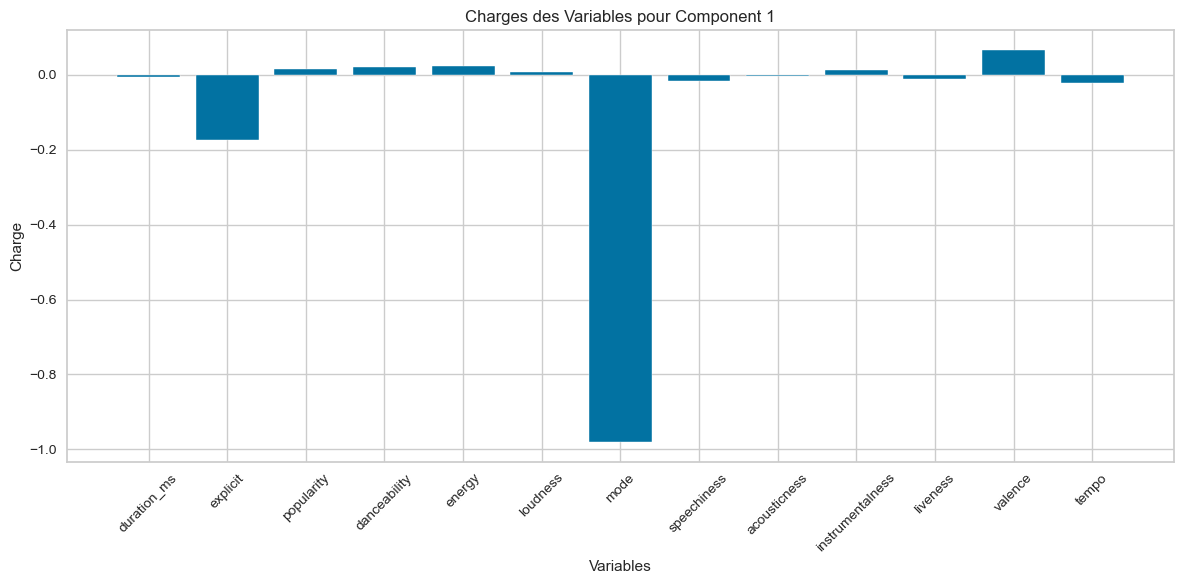

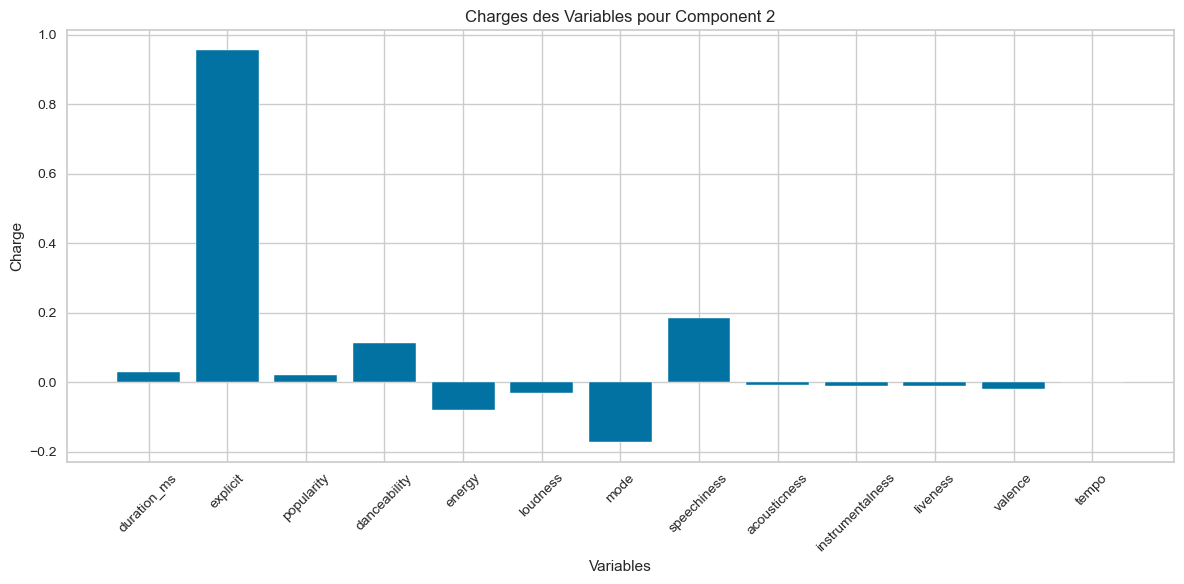

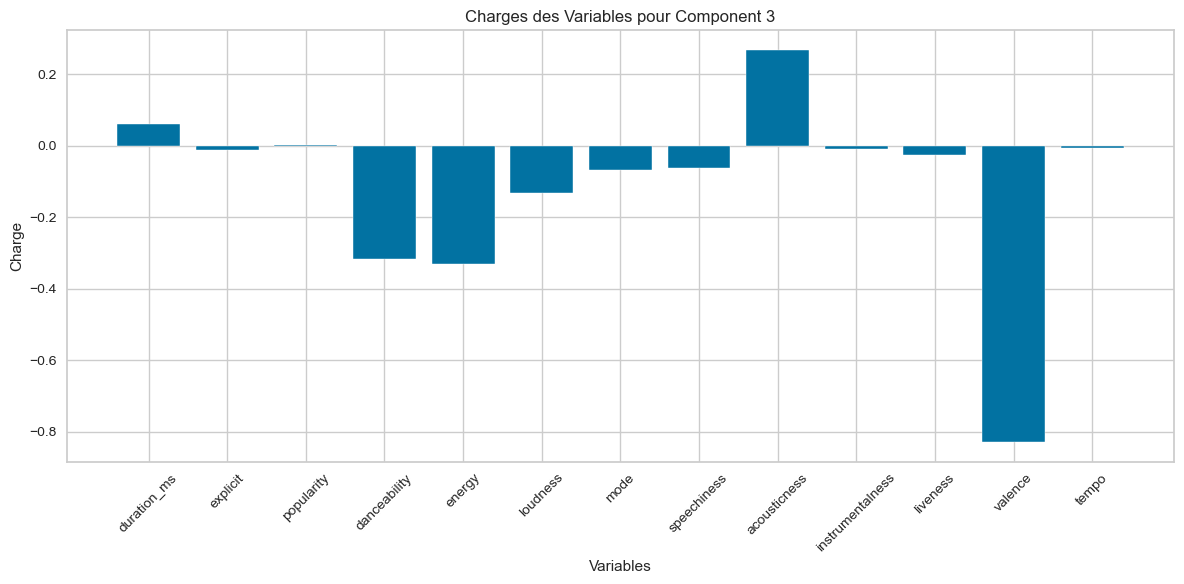

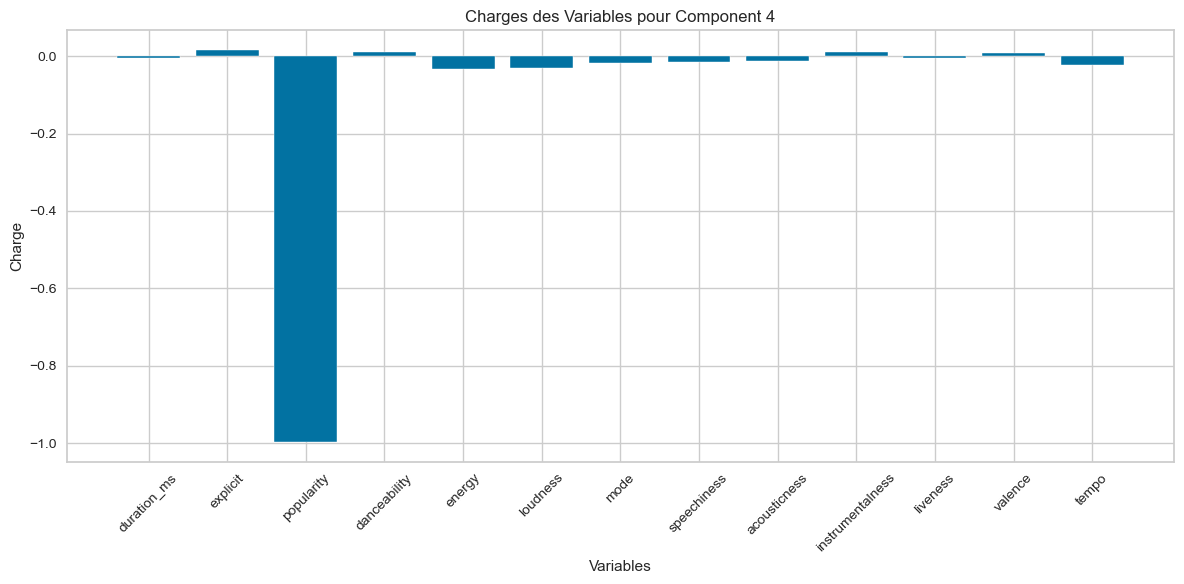

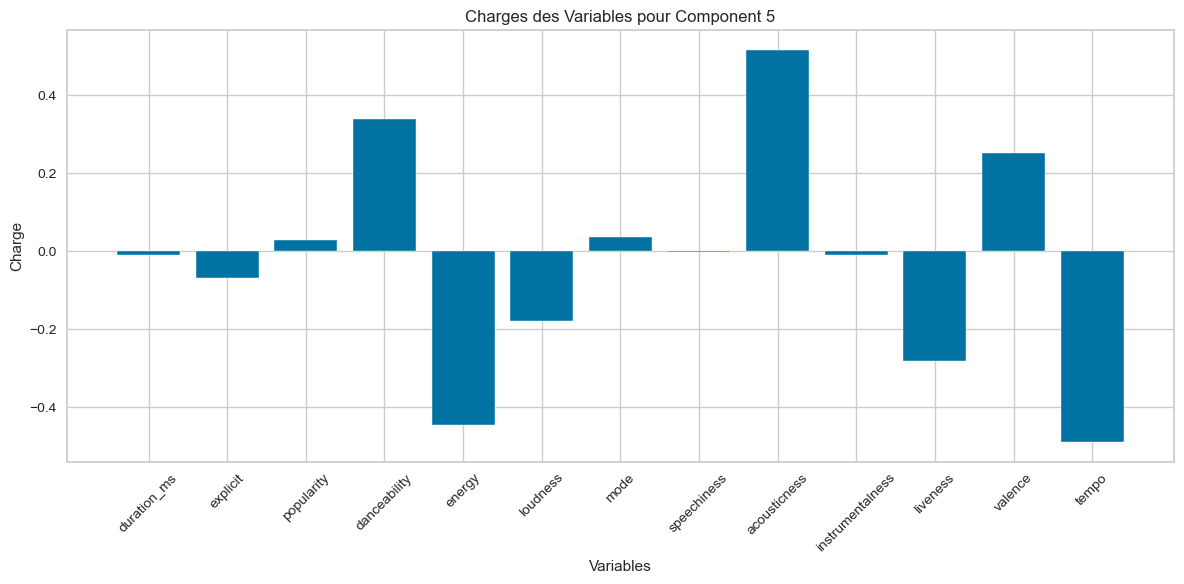

In [305]:
component_loadings = pca.components_

loadings_df = pd.DataFrame(component_loadings, columns=X_train.columns, index=[f'Component {i+1}' for i in range(len(component_loadings))])

loadings_df = loadings_df.T

for component in loadings_df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(loadings_df.index)) 
    y = loadings_df[component] 
    
    ax.bar(x, y)
    ax.set_title(f"Charges des Variables pour {component}")
    ax.set_xlabel("Variables")
    ax.set_ylabel("Charge")
    ax.set_xticks(x)
    ax.set_xticklabels(loadings_df.index, rotation=45)

    plt.tight_layout()
    plt.show()


Composante 1 :

Cette composante est fortement influencée par le mode (major ou mineur) avec une charge négative importante pour le mode.
Elle est aussi influencée par la présence de paroles explicites (avec une charge négative).
La popularité, la danseabilité, l'énergie et la valence ont des charges positives, ce qui signifie que cette composante est associée à des chansons populaires, énergiques, dansantes et positives.
Les variables telles que la durée, le tempo et l'acousticness ont des charges faibles et sont moins importantes pour cette composante.

Composante 2 :

Cette composante est principalement influencée par la présence de paroles explicites (explicit) avec une charge positive élevée.
Elle est également influencée par la speechiness, la valence et la danseabilité.
La charge négative pour l'énergie suggère que cette composante est associée à des chansons moins énergiques.
Le mode a également une influence négative sur cette composante, ce qui signifie qu'elle est liée aux chansons en mode mineur.
Les autres variables ont des charges relativement faibles pour cette composante.

Composante 3 :

Cette composante est influencée principalement par la valence avec une charge négative importante.
Elle est également influencée par l'acousticness, ce qui suggère que les chansons sont plus acoustiques et moins électroniques.
Le tempo a une charge négative, indiquant des chansons plus lentes.
Les autres variables ont des charges plus faibles pour cette composante.

Composante 4 :

Cette composante est fortement influencée par la popularité avec une charge négative élevée.
Elle est également influencée par l'instrumentalness, ce qui suggère une association avec des chansons instrumentales.
La danseabilité a une charge positive, les chansons sont dansantes.
Les autres variables ont des charges relativement faibles pour cette composante.

Composante 5 :

Cette composante est influencée principalement par l'acousticness avec une charge positive élevée, indiquant des chansons acoustiques.
Elle est également influencée par la valence et la danseabilité.
Le tempo a une charge négative, les chansons sont donc plus lentes.
Les autres variables ont des charges moins importantes pour cette composante.

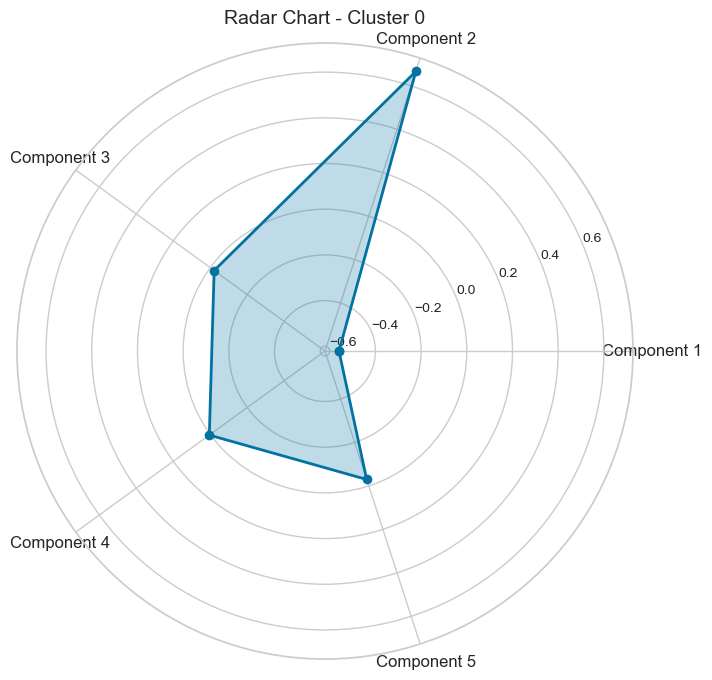

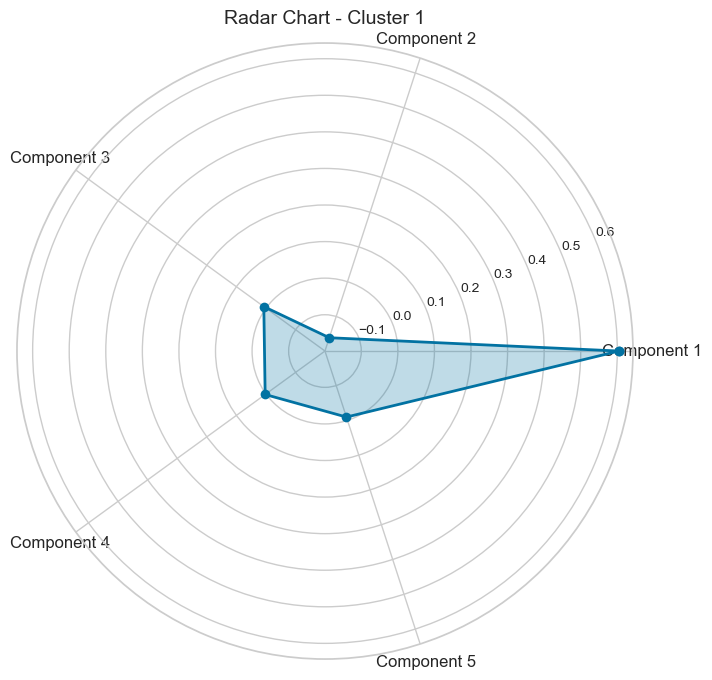

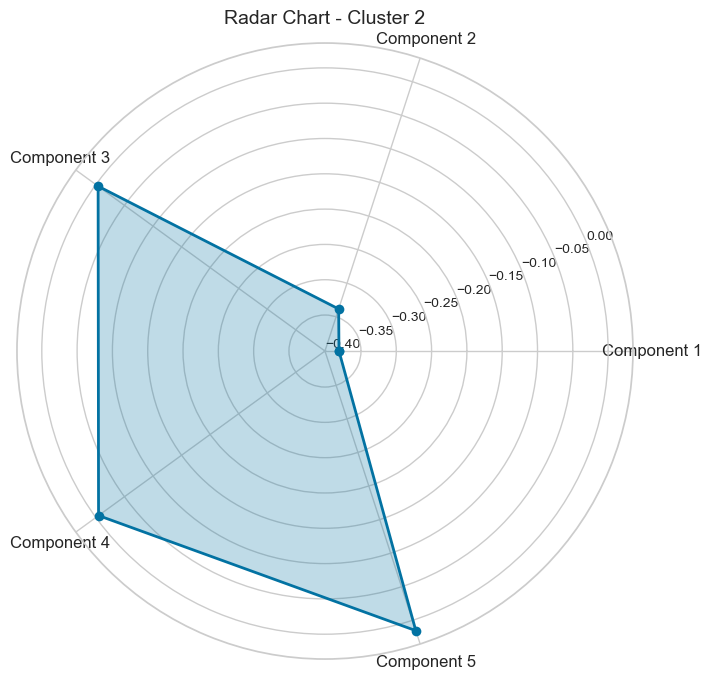

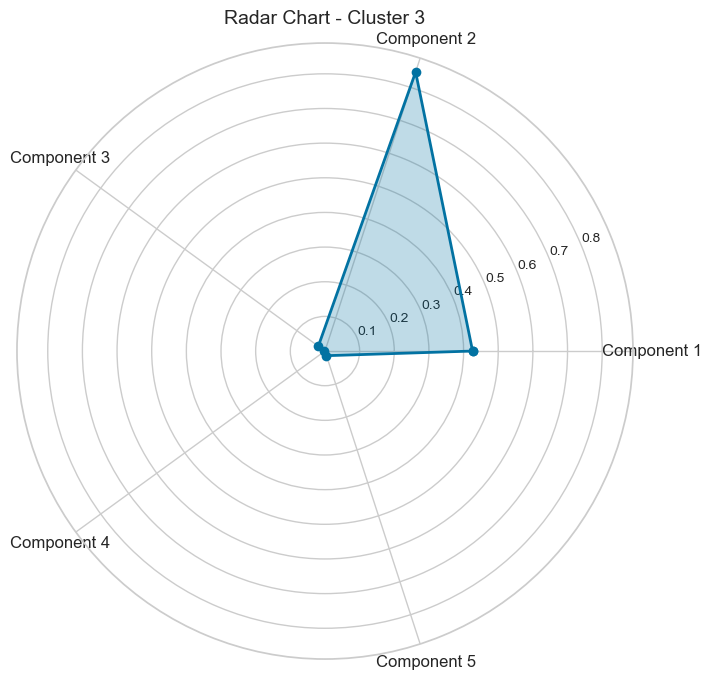

In [312]:
# radar chart
clusters = [0, 1, 2, 3]

features = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'] 

cluster_means = pd.DataFrame(index=features)

for cluster in clusters:
    cluster_data = df_seg_pca_kmeans[df_seg_pca_kmeans['Cluster'] == cluster]
    
    means = cluster_data[features].mean()
    cluster_means[f'Cluster {cluster}'] = means

for cluster in clusters:
    plt.figure(figsize=(8, 8))
    
    cluster_mean = cluster_means[f'Cluster {cluster}'].values
    
    num_vars = len(features)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] 
    
    cluster_mean = np.concatenate((cluster_mean, [cluster_mean[0]])) 
    cluster_mean = cluster_mean.tolist()
    
    plt.polar(angles, cluster_mean, 'o-', linewidth=2)
    plt.fill(angles, cluster_mean, alpha=0.25)
    
    plt.xticks(angles[:-1], features, fontsize=12)
    
    plt.title(f'Radar Chart - Cluster {cluster}', fontsize=14)
    
    plt.show()

Cluster 1 : 

La composante 1 a une influence négative, ce qui signifie que ce cluster contient des chansons ayant des valeurs plus faibles pour les attributs associés à cette composante. Par exemple, ces chansons peuvent être moins explicites, moins populaires, moins dansantes, moins énergiques, moins fortes en termes de volume sonore, et peuvent être dans des modes majeurs.
La composante 2 a une influence positive, les chansons sont par exemple plus explicites, populaires, dansantes, énergiques, fortes en termes de volume sonore, et peuvent être dans des modes mineurs.
Les autres composantes ont des valeurs proches de zéro, elles ont peu d'influence sur ce cluster.

Cluster 2 :

La composante 1 a une influence positive. Ces chansons peuvent être plus explicites, populaires, dansantes, énergiques, et fortes en termes de volume sonore.
La composante 2 a une influence négative.
Les autres composantes ont des valeurs proches de zéro.

Cluster 3 :

La composante 1 a une influence négative. Par exemple, ces chansons peuvent être moins explicites, moins populaires, moins dansantes, moins énergiques, moins fortes en termes de volume sonore, et peuvent être dans des modes majeurs.
La composante 2 a une influence négative également.
Les autres composantes ont des valeurs négatives, mais elles sont relativement faibles, indiquant une influence moindre.

Cluster 4 :

La composante 1 a une influence positive. Par exemple, ces chansons peuvent être plus explicites, plus populaires, plus dansantes, plus énergiques, plus fortes en termes de volume sonore, et peuvent être dans des modes mineurs.
La composante 2 a une influence positive très forte, indiquant que ce cluster peut contenir des chansons avec des valeurs très élevées pour cette composante.
Les autres composantes ont peu d'influence sur ce cluster.

Pour conclure, nous avons classifié nos données en 4 clusters différents, en se basant sur 5 composantes, ce qui a permis d'obtenir des clusters assez séparés les uns des autres, et de réaliser des recommandations musicales cohérentes par rapport à la chanson d'entrée.